In [11]:
# TODO
# [] import reactions and template json.gz files
# [] determine number of reactions
# [] determine number of templates

In [1]:
import os
import gzip
import json

import rdkit
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

In [2]:
with gzip.open('/data/localhost/not-backed-up/mokaya/exscientia/Retro/Templates/uspto.reactions.json.gz', 'r') as reactions_file:
    data = reactions_file.read()
    json_reaction_file = json.loads(data, encoding='utf-8')


In [3]:
with gzip.open('/data/localhost/not-backed-up/mokaya/exscientia/Retro/Templates/uspto.templates.json.gz', 'r') as templates_file:
    data = templates_file.read()
    json_templates_file = json.loads(data, encoding='utf-8')

In [4]:
# Structure of reaction and template reactions

print(json_reaction_file[:1])
print(json_templates_file[:2])

[{'_id': 0, 'reactants': '[Br:1][CH2:2][CH2:3][OH:4].[CH2:5]([S:7](Cl)(=[O:9])=[O:8])[CH3:6].CCOCC', 'products': '[CH2:5]([S:7]([O:4][CH2:3][CH2:2][Br:1])(=[O:9])=[O:8])[CH3:6]', 'spectators': 'C(N(CC)CC)C', 'source': 'uspto', 'source_id': 'd55b478b903cc66713bcd03da0cb590206c063770b25661297a153ea49f28716'}]
[{'reaction_id': 0, 'reactants': 'Cl-[S;H0;D4;+0:1](-[C:2])(=[O;D1;H0:3])=[O;D1;H0:4].[C:5]-[OH;D1;+0:6]', 'intra_only': False, 'products': '[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C:2])(=[O;D1;H0:3])=[O;D1;H0:4]', 'reaction_smarts': '[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C:2])(=[O;D1;H0:3])=[O;D1;H0:4]>>Cl-[S;H0;D4;+0:1](-[C:2])(=[O;D1;H0:3])=[O;D1;H0:4].[C:5]-[OH;D1;+0:6]', 'dimer_only': False, 'necessary_reagent': ''}, {'reaction_id': 1, 'reactants': 'Cl-[S;H0;D4;+0:1](-[C;D1;H3:2])(=[O;D1;H0:3])=[O;D1;H0:4].[C:5]-[OH;D1;+0:6]', 'intra_only': False, 'products': '[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C;D1;H3:2])(=[O;D1;H0:3])=[O;D1;H0:4]', 'reaction_smarts': '[C:5]-[O;H0;D2;+0:6]-[S

In [5]:
#Number of reactions / number of templates

print('Number of reactions: ', len(json_reaction_file))
print('Number of templates: ', len(json_templates_file))

Number of reactions:  1808254
Number of templates:  1808176


In [24]:
print(json_templates_file[3])
print(json_reaction_file[3])

{'reaction_id': 3, 'reactants': 'Cl-[S;H0;D4;+0:1](-[C:2])(=[O;D1;H0:3])=[O;D1;H0:4].[C:5]-[OH;D1;+0:6]', 'intra_only': False, 'products': '[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C:2])(=[O;D1;H0:3])=[O;D1;H0:4]', 'reaction_smarts': '[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C:2])(=[O;D1;H0:3])=[O;D1;H0:4]>>Cl-[S;H0;D4;+0:1](-[C:2])(=[O;D1;H0:3])=[O;D1;H0:4].[C:5]-[OH;D1;+0:6]', 'dimer_only': False, 'necessary_reagent': ''}
{'_id': 3, 'reactants': '[Br:1][CH2:2][CH2:3][OH:4].[CH2:5]([S:7](Cl)(=[O:9])=[O:8])[CH3:6].CCOCC', 'products': '[CH2:5]([S:7]([O:4][CH2:3][CH2:2][Br:1])(=[O:9])=[O:8])[CH3:6]', 'spectators': 'C(N(CC)CC)C', 'source': 'uspto', 'source_id': '11b36b516a4e353d293245bc8a3af922dc42c0e5d1e06cf6a6134ae500c47787'}


In [19]:
# number of unique reaction smarts

reaction_smarts = []
count = 0
for i in json_templates_file:
    if i.get('reaction_smarts') == None:
        count += 1 
        print('None: ', i)
    else:
        reaction_smarts.append(i.get('reaction_smarts'))

print('Total Reaction templates: ', len(reaction_smarts))
print('# Unique reaction templates: ', len(set(reaction_smarts)))
print('# Reactions without reaction smarts: ', count)

None:  {'reaction_id': 8}
None:  {'reaction_id': 9}
None:  {'reaction_id': 10}
None:  {'reaction_id': 11}
None:  {'reaction_id': 13}
None:  {'reaction_id': 16}
None:  {'reaction_id': 20}
None:  {'reaction_id': 21}
None:  {'reaction_id': 85}
None:  {'reaction_id': 112}
None:  {'reaction_id': 114}
None:  {'reaction_id': 128}
None:  {'reaction_id': 147}
None:  {'reaction_id': 148}
None:  {'reaction_id': 196}
None:  {'reaction_id': 203}
None:  {'reaction_id': 205}
None:  {'reaction_id': 206}
None:  {'reaction_id': 218}
None:  {'reaction_id': 239}
None:  {'reaction_id': 247}
None:  {'reaction_id': 288}
None:  {'reaction_id': 300}
None:  {'reaction_id': 312}
None:  {'reaction_id': 329}
None:  {'reaction_id': 330}
None:  {'reaction_id': 342}
None:  {'reaction_id': 398}
None:  {'reaction_id': 399}
None:  {'reaction_id': 418}
None:  {'reaction_id': 423}
None:  {'reaction_id': 424}
None:  {'reaction_id': 443}
None:  {'reaction_id': 444}
None:  {'reaction_id': 445}
None:  {'reaction_id': 464}
Non

KeyboardInterrupt: 

In [7]:
# number of reactions (total and unique)

reaction_ids = []
for i in json_file:
    reaction_ids.append(i.get('source_id'))

print('Total number of reactions: ', len(reaction_ids))
print('Unique reactions: ', len(set(reaction_ids)))

NameError: name 'json_file' is not defined

In [8]:
# Frequency of each reaction template from list of reaction SMARTS (reaction_smarts)

template_freq = {}

for item in reaction_smarts:
    if (item in template_freq):
        template_freq[item] += 1
    else:
        template_freq[item] = 1

sorted_template_freq = dict(sorted(template_freq.items(), reverse=True, key=lambda item: item[1]))
top3_template = list(sorted_template_freq.items())[:3]

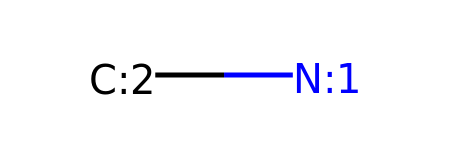

In [57]:
mol = Chem.rdmolfiles.MolFromSmarts('[NH2;D1;+0:1]-[c:2]')
mol2 = Chem.rdmolfiles.MolFromSmarts('O=[N+;H0;D3:1](-[O-])-[c:2]')
mol
#

In [10]:
# print top 3 popular reactions from template database

top15_template = list(sorted_template_freq.items())[:15]

item = 0
for i in top15_template:
    rxn = i[0]
    react = rxn.split('>>')[0]
    prod = rxn.split('>>')[1]

    reactMol = Chem.MolFromSmarts(react)
    prodMol = Chem.MolFromSmarts(prod)

    Draw.MolToFile(reactMol, '/data/localhost/not-backed-up/mokaya/exscientia/Retro/Templates/Images/reactMol_'+str(item)+'.png')
    Draw.MolToFile(prodMol, '/data/localhost/not-backed-up/mokaya/exscientia/Retro/Templates/Images/prodMol_'+str(item)+'.png')

    item += 1


RDKit ERROR: getExplicitValence() called without call to calcExplicitValence()
RDKit ERROR: Violation occurred on line 196 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101077249/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_explicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [16:16:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getExplicitValence() called without call to calcExplicitValence()
RDKit ERROR: Violation occurred on line 196 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101077249/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_explicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [16:16:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getExplicitValence() called without call to calcExplicitValence()
RDKit ERROR: Violation occurred on line 196 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101077249/

In [18]:
# print top 3 popular reactions from template database

top60_template = list(sorted_template_freq.items())[:60]

item = 0
for i in top60_template:
    rxn = i[0]
    react = rxn.split('>>')[0]
    prod = rxn.split('>>')[1]

    reactMol = Chem.MolFromSmarts(react)
    prodMol = Chem.MolFromSmarts(prod)

    Draw.MolToFile(reactMol, '/data/localhost/not-backed-up/mokaya/exscientia/Retro/Templates/Images/reactionSearch/topReactMol_'+str(item)+'.png')
    Draw.MolToFile(prodMol, '/data/localhost/not-backed-up/mokaya/exscientia/Retro/Templates/Images/reactionSearch/topProdMol_'+str(item)+'.png')

    item += 1

RDKit ERROR: Violation occurred on line 196 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101077249/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_explicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:21:54] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getExplicitValence() called without call to calcExplicitValence()
RDKit ERROR: Violation occurred on line 196 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101077249/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_explicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:21:54] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getExplicitValence() called without call to calcExplicitValence()
RDKit ERROR: Violation occurred on line 196 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101077249/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_explicitValence >

In [13]:
carbonyl = Chem.MolFromSmiles('CC(C)=O')
carbonyl_smarts = Chem.MolToSmarts(carbonyl)

print(carbonyl_smarts)

[#6]-[#6](-[#6])=[#8]


In [36]:
dict(sorted(template_freq.items(), reverse=True, key=lambda item: item[1]))

{None: 114998,
 '[NH2;D1;+0:1]-[c:2]>>O=[N+;H0;D3:1](-[O-])-[c:2]': 24761,
 '[O;D1;H0:3]=[C:2]-[OH;D1;+0:1]>>C-[O;H0;D2;+0:1]-[C:2]=[O;D1;H0:3]': 16356,
 '[O;D1;H0:3]=[C:2]-[OH;D1;+0:1]>>C-C-[O;H0;D2;+0:1]-[C:2]=[O;D1;H0:3]': 14209,
 '[C:2]-[NH;D2;+0:1]-[C:3]>>C-C(-C)(-C)-O-C(=O)-[N;H0;D3;+0:1](-[C:2])-[C:3]': 11249,
 '[OH;D1;+0:1]-[c:2]>>C-[O;H0;D2;+0:1]-[c:2]': 8455,
 '[C:2]-[CH2;D2;+0:1]-[O;H0;D2;+0:3]-[c:4]>>Br-[CH2;D2;+0:1]-[C:2].[OH;D1;+0:3]-[c:4]': 6936,
 '[C:2]-[NH2;D1;+0:1]>>C-C(-C)(-C)-O-C(=O)-[NH;D2;+0:1]-[C:2]': 5985,
 '[#7;a:2]:[c;H0;D3;+0:1](:[#7;a:3])-[NH;D2;+0:4]-[c:5]>>Cl-[c;H0;D3;+0:1](:[#7;a:2]):[#7;a:3].[NH2;D1;+0:4]-[c:5]': 5431,
 '[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C;D1;H3:2])(=[O;D1;H0:3])=[O;D1;H0:4]>>Cl-[S;H0;D4;+0:1](-[C;D1;H3:2])(=[O;D1;H0:3])=[O;D1;H0:4].[C:5]-[OH;D1;+0:6]': 5132,
 '[C:3]-[C;H0;D3;+0:2](=[O;H0;D1;+0:1])-[OH;D1;+0:4]>>C-[O;H0;D2;+0:1]-[C;H0;D3;+0:2](-[C:3])=[O;H0;D1;+0:4]': 4847,
 '[C:3]-[C;H0;D3;+0:2](=[O;H0;D1;+0:1])-[OH;D1;+0:4]>>C-C-[O